In [93]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit

from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key

In [79]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [80]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [81]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=775e0351c6b27c2e306a649ec8a1e42f


In [83]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [87]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | itacurubi del rosario
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | piacabucu
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | ponnani
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | blythe
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | drabiv
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | isiro
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | port-gentil
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | parfenyevo
Processing Record 23 of 

Processing Record 37 of Set 4 | tyumentsevo
Processing Record 38 of Set 4 | souillac
Processing Record 39 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 4 | qaanaaq
Processing Record 41 of Set 4 | adrar
Processing Record 42 of Set 4 | zhezkazgan
Processing Record 43 of Set 4 | santo antonio do ica
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | deer lake
Processing Record 46 of Set 4 | dingle
Processing Record 47 of Set 4 | charters towers
Processing Record 48 of Set 4 | lasa
Processing Record 49 of Set 4 | ust-koksa
Processing Record 50 of Set 4 | chipinge
Processing Record 1 of Set 5 | kushiro
Processing Record 2 of Set 5 | manoel urbano
Processing Record 3 of Set 5 | jalu
Processing Record 4 of Set 5 | opuwo
Processing Record 5 of Set 5 | japura
Processing Record 6 of Set 5 | toora-khem
Processing Record 7 of Set 5 | vega de alatorre
Processing Record 8 of Set 5 | atbasar
Processing Record 9 of Set 5 | rosarito
Processing Re

Processing Record 26 of Set 8 | auka
Processing Record 27 of Set 8 | bonnyville
Processing Record 28 of Set 8 | camacha
Processing Record 29 of Set 8 | aklavik
Processing Record 30 of Set 8 | maragogi
Processing Record 31 of Set 8 | hit
Processing Record 32 of Set 8 | tahta
Processing Record 33 of Set 8 | tuatapere
Processing Record 34 of Set 8 | san narciso
Processing Record 35 of Set 8 | papetoai
Processing Record 36 of Set 8 | sulphur springs
Processing Record 37 of Set 8 | hemsedal
Processing Record 38 of Set 8 | mookane
Processing Record 39 of Set 8 | lixourion
Processing Record 40 of Set 8 | allapalli
Processing Record 41 of Set 8 | itarsi
Processing Record 42 of Set 8 | kamloops
Processing Record 43 of Set 8 | kavaratti
Processing Record 44 of Set 8 | sabang
Processing Record 45 of Set 8 | bragadiru
Processing Record 46 of Set 8 | tungkang
City not found. Skipping...
Processing Record 47 of Set 8 | ostrovnoy
Processing Record 48 of Set 8 | domoni
Processing Record 49 of Set 8 | 

Processing Record 14 of Set 12 | kashan
Processing Record 15 of Set 12 | aripuana
Processing Record 16 of Set 12 | hisar
Processing Record 17 of Set 12 | kedrovyy
Processing Record 18 of Set 12 | clarence town
Processing Record 19 of Set 12 | khonuu
City not found. Skipping...
Processing Record 20 of Set 12 | baena
Processing Record 21 of Set 12 | kenai
Processing Record 22 of Set 12 | akyab
Processing Record 23 of Set 12 | inuvik
Processing Record 24 of Set 12 | portel
Processing Record 25 of Set 12 | asfi
Processing Record 26 of Set 12 | denizli
Processing Record 27 of Set 12 | rongcheng
Processing Record 28 of Set 12 | hasaki
Processing Record 29 of Set 12 | sayat
Processing Record 30 of Set 12 | challapata
Processing Record 31 of Set 12 | lodwar
Processing Record 32 of Set 12 | senneterre
Processing Record 33 of Set 12 | hofn
Processing Record 34 of Set 12 | cruz grande
Processing Record 35 of Set 12 | talcahuano
Processing Record 36 of Set 12 | champerico
Processing Record 37 of S

In [90]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Itacurubi Del Rosario,-24.5000,-56.6833,89.42,32,0,9.19,PY,2022-02-06 15:42:25
1,Jamestown,42.0970,-79.2353,25.52,49,0,7.00,US,2022-02-06 15:39:23
2,Piacabucu,-10.4056,-36.4344,87.37,58,13,13.82,BR,2022-02-06 15:42:25
3,Vaini,-21.2000,-175.2000,73.56,100,100,13.80,TO,2022-02-06 15:42:26
4,Kavieng,-2.5744,150.7967,81.55,78,100,3.78,PG,2022-02-06 15:42:26
5,Arraial Do Cabo,-22.9661,-42.0278,91.26,52,0,17.27,BR,2022-02-06 15:42:26
6,Yellowknife,62.4560,-114.3525,-12.44,83,75,11.50,CA,2022-02-06 15:41:59
7,Lorengau,-2.0226,147.2712,81.72,78,96,6.31,PG,2022-02-06 15:40:03
8,Ponnani,10.7670,75.9252,79.92,77,65,7.43,IN,2022-02-06 15:42:27
9,Barrow,71.2906,-156.7887,-20.18,69,20,5.75,US,2022-02-06 15:38:52


In [92]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [96]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644176574.3728125

In [99]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

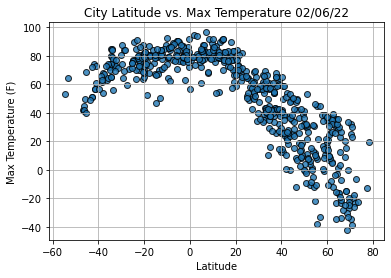

In [100]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

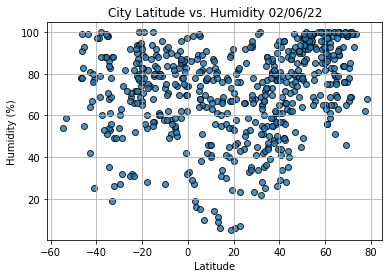

In [101]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

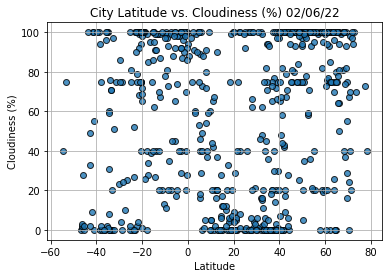

In [102]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

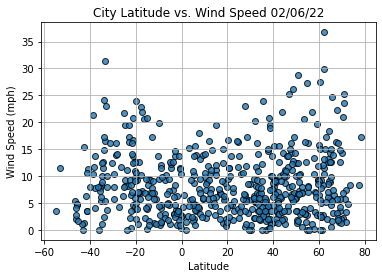

In [103]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()